# INF552 - Homework Assignment 1

ID: 1020534487

Name: Jaya Shree

K Nearest Neighbor algorithm on Vertebral Column Data Set

In [1]:
# Import all required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# (a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

In [2]:
# Reading the downloaded file
fname="column_2C.dat"

header = ["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius", "grade of spondylolisthesi", "label"]
df = pd.read_csv(fname, header=None, sep=' ', names = header)
df.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesi,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


# (b) Pre-Processing and Exploratory data analysis:

    i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

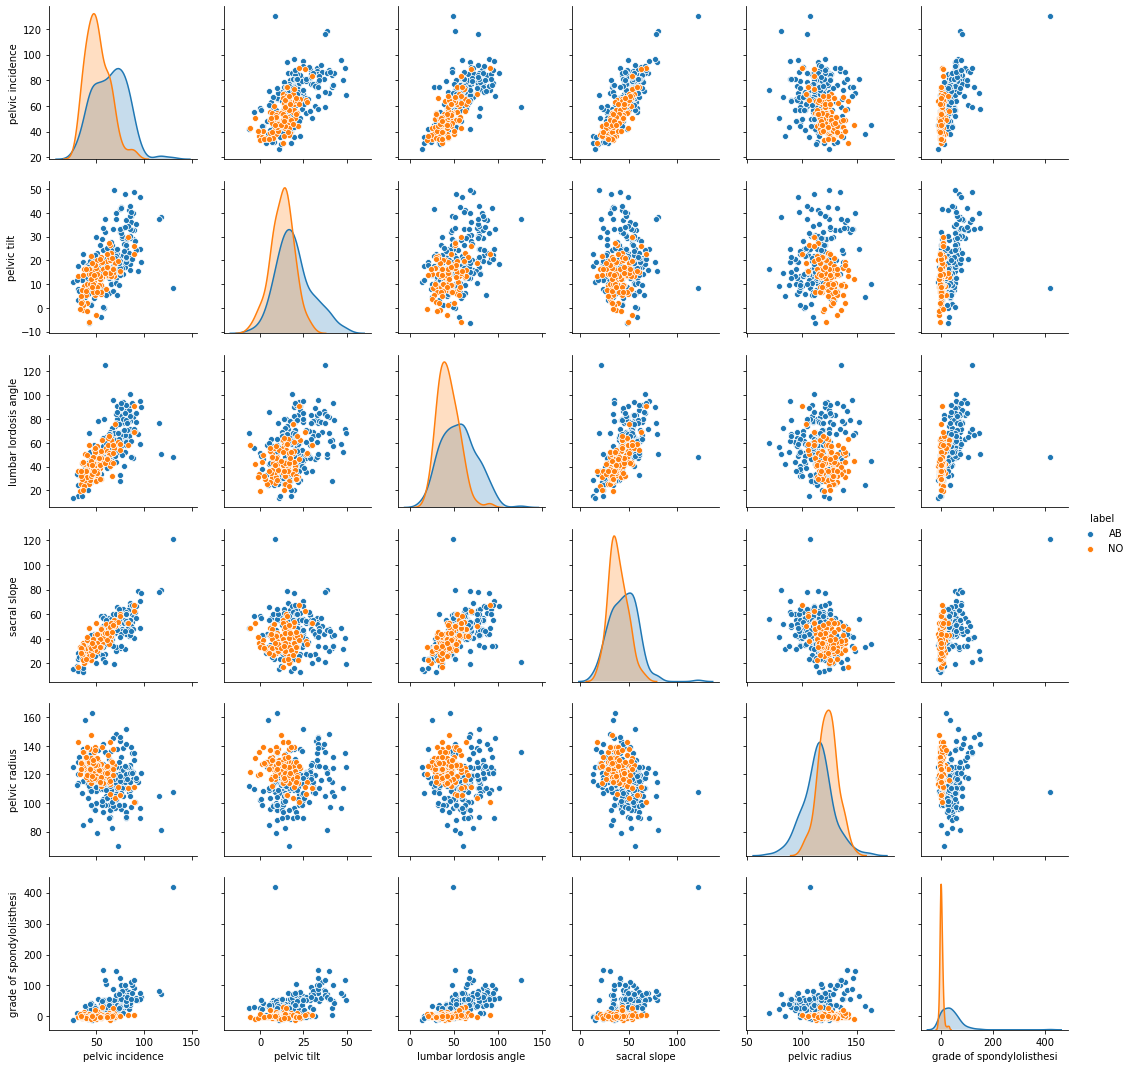

In [3]:
sns.pairplot(df, vars=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle',
       'sacral slope', 'pelvic radius', 'grade of spondylolisthesi'], hue='label')

    ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 

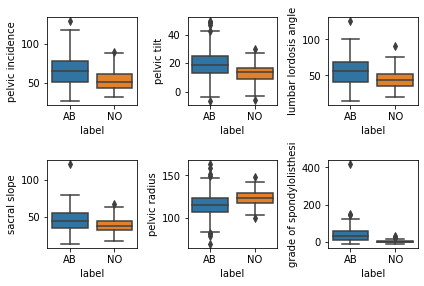

In [4]:
fig, ax = plt.subplots(2, 3)

for i, variable in enumerate(header):
    if variable != 'label':
        x = i//3
        y = i%3
        sns.boxplot(data=df, y=df[variable], x=df['label'], ax=ax[x][y])

fig.tight_layout()


    iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set

In [5]:
# Rename label names with corresponding numericals
df['label'] = df['label'].map({'AB': 1, 'NO': 0})

In [6]:
# Create Training Dataframe
df_class0_train = df[df['label'] == 0][:70]
df_class1_train = df[df['label'] == 1][:140]
df_train = pd.concat([df_class0_train, df_class1_train]).reset_index(drop=True)
df_train.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesi,label
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0


In [7]:
# Create Testing Dataframe
df_class0_test = df[df['label'] == 0][70:]
df_class1_test = df[df['label'] == 1][140:]
df_test = pd.concat([df_class0_test, df_class1_test]).reset_index(drop=True)
df_test.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesi,label
0,50.09,13.43,34.46,36.66,119.13,3.09,0
1,64.26,14.50,43.90,49.76,115.39,5.95,0
2,53.68,13.45,41.58,40.24,113.91,2.74,0
3,49.00,13.11,51.87,35.88,126.40,0.54,0
4,59.17,14.56,43.20,44.60,121.04,2.83,0


In [8]:
# Convert training dataframe into X_train and y_train numpy arrays
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

print("Size of training data and label: ", X_train.shape, y_train.shape)

# Convert training dataframe into X_test and y_test numpy arrays
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print("Size of testing data and label: ", X_test.shape, y_test.shape)

Size of training data and label:  (210, 6) (210,)
Size of testing data and label:  (100, 6) (100,)


# (c) Classification using KNN on Vertebral Column Data Set

    i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).
    ii. Test all the data in the test database with k-nearest neighbors. Take decisions by majority polling. 
    Plot train and test errors in terms of k for k ∈ {208,205, . . . ,7,4,1,}(in reverse order).
    Which k∗ is the most suitable k among those values?
    Calculate the confusion matrix, true positive rate, true negative rate, precision and F-score when k=k∗.
    

I have used number of errors at the y axis here, because assignment mentions test errors instead of test error rate.


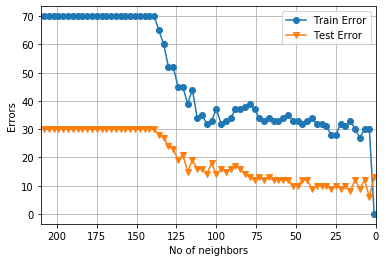

The most suitable k among all values is  4
Confusion Matrix: 
 [[25  5]
 [ 1 69]]
True positive rate:  0.9857142857142858
True negative rate:  0.8333333333333334
Precision:  0.9324324324324325
F1 Score :  0.9583333333333333


In [18]:
from sklearn.neighbors import KNeighborsClassifier
list_k = list()
train_errors = list()
test_errors = list()

min_error = float('inf')
best_k = None


k = 208
while k>0:

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    list_k.append(k)
    train_error = 1-metrics.accuracy_score(neigh.predict(X_train), y_train)
    test_error = 1-metrics.accuracy_score(neigh.predict(X_test), y_test)
    
#     train_errors.append(train_error)
#     test_errors.append(test_error)
    
    train_errors.append(int(train_error * y_train.shape[0]))
    test_errors.append(int(test_error * y_test.shape[0]))
    
    if min_error > test_error:
        min_error = test_error
        best_k = k

    k -= 3
    
print("I have used number of errors at the y axis here, because assignment mentions test errors instead of test error rate.")

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(list_k, train_errors, label="Train Error", color='tab:blue', marker='o')
ax.plot(list_k, test_errors, label="Test Error", color='tab:orange', marker='v')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim(210, 0)
plt.xlabel("No of neighbors")
plt.ylabel("Errors")
plt.show()

print("The most suitable k among all values is ",best_k)

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

tn, fp, fn, tp = cm.ravel()
print("True positive rate: ", tp/(tp+fn))
print("True negative rate: ", tn/(tn+fp))
print("Precision: ", tp/(tp+fp))
print("F1 Score : ", metrics.f1_score(y_test, y_pred))


    iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}.
    Note: for each N, select your training set by choosing the first N//3 rows of Class 0 and the first N − N//3 rows of Class 1 in the training set you creatd in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve

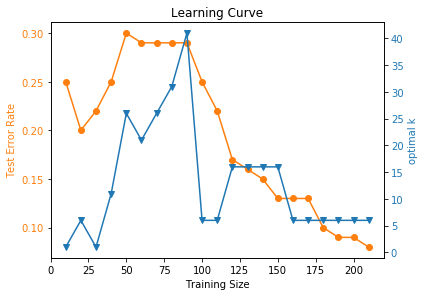

In [10]:
list_k = list()
training_size = list()
test_errors = list()


N = 10

while N <= 210:
    
    training_size.append(N)
    df_train = pd.concat([df_class0_train[:N//3], df_class1_train[:N-N//3]]).reset_index(drop=True)
    
    X_train = df_train.drop('label', axis=1)
    y_train = df_train['label']

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    

    min_error = float('inf')
    best_k = None

    k = 1
    while k<N:

        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train, y_train)

        test_error = 1-metrics.accuracy_score(neigh.predict(X_test), y_test)

        if min_error > test_error:
            min_error = test_error
            best_k = k
            
        k += 5
        
    test_errors.append(min_error)
    list_k.append(best_k)
    N += 10 

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Training Size')
ax1.set_ylabel('Test Error Rate', color=color)
ax1.plot(training_size, test_errors, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('optimal k', color=color)  # we already handled the x-label with ax1
ax2.plot(training_size, list_k, color=color, marker='v')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Learning Curve")
plt.show()


# (d) Replace the Euclidean metric with the following metrics4 and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

    i. Minkowski Distance:
        A. which becomes Manhattan Distance with p = 1.
        B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. 
            In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)? 
        C. which becomes Chebyshev Distance with p → ∞
    ii. Mahalanobis Distance

In [11]:
# Recreate the training set
df_train = pd.concat([df_class0_train, df_class1_train]).reset_index(drop=True)
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
test_errors = list()
best_ks = list()
distance_types = ["manhattan", "chebyshev", "mahalanobis"]


for distance_type in distance_types:

    best_k = None
    min_error = float('inf')

    k = 1
    while k<210:
        if distance_type == "mahalanobis":
            neigh = KNeighborsClassifier(n_neighbors=k, algorithm='brute', 
                               metric='mahalanobis', 
                               metric_params={'V': np.cov(X_train)})
        else:              
            neigh = KNeighborsClassifier(n_neighbors=k, metric=distance_type)
        neigh.fit(X_train, y_train)

        test_error = 1-metrics.accuracy_score(neigh.predict(X_test), y_test)

        if min_error > test_error:
            min_error = test_error
            best_k = k
        
        if distance_type == "manhattan":
            use_k = best_k

        k += 5
            
    test_errors.append(min_error)
    best_ks.append(best_k)
    
    
    if distance_type == "manhattan":
        best_logp = None
        min_error_minkowski = float('inf')

        logp_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
        for logp in logp_list:
            p = 10**logp
            neigh = KNeighborsClassifier(n_neighbors=use_k, metric='minkowski', p=p)
            neigh.fit(X_train, y_train)
            test_error = 1-metrics.accuracy_score(neigh.predict(X_test), y_test)

            if min_error_minkowski > test_error:
                min_error_minkowski = test_error
                best_logp = logp
                
print("Best log10(p) is ", best_logp)

d = {"Distance Metric" : distance_types, "Best k" : best_ks, "Test Error Rate" : test_errors}
pd.DataFrame(d)

# (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

In [13]:
test_errors = list()
best_ks = list()
distance_types = ["euclidean", "manhattan", "chebyshev"]


for distance_type in distance_types:

    best_k = None
    min_error = float('inf')

    k = 1
    while k<210:
              
        neigh = KNeighborsClassifier(n_neighbors=k, metric=distance_type, weights="distance")
        neigh.fit(X_train, y_train)

        test_error = 1-metrics.accuracy_score(neigh.predict(X_test), y_test)

        if min_error > test_error:
            min_error = test_error
            best_k = k

        k += 5
            
    test_errors.append(min_error)
    best_ks.append(best_k)
   
d = {"Distance Metric" : distance_types, "Best k" : best_ks, "Test Error" : test_errors}
pd.DataFrame(d)
 

,Distance Metric,Best k,Test Error
0,euclidean,6,0.10
1,manhattan,26,0.10
2,chebyshev,16,0.11


# (f) What is the lowest training error rate you achieved in this homework?

Lowest error achieved on training data is 0.0. This is when k=1 and every point's distance is measured to just itself to get the prediction.